# Exercise 5: Comparing Yearly Average Performances
### ***Task***: For each company (a.) Compute the yearly average of the **Close** price, (b.) Plot a comparison of yearly averages for all companies on a chart. Justify your chart selection

In [1]:
import pandas as pd

# Load datasets into a dictionary
file_paths = {
    "YUM": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/YUM.csv",
    "WEN": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/WEN.csv",
    "SBUX": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/SBUX.csv",
    "QSR": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/QSR.csv",
    "PZZA": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/PZZA.csv",
    "MCD": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/MCD.csv",
    "LKNCY": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/LKNCY.csv",
    "DPZ": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DPZ.csv",
    "DNUT": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DNUT.csv",
    "BRK-A": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/BRK-A.csv"
}

# Read and process datasets
yearly_averages = {}

for company, path in file_paths.items():
    data = pd.read_csv(path)
    # Ensure the date column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # Extract year from the Date column
    data['Year'] = data['Date'].dt.year
    # Calculate yearly average Close price
    yearly_avg = data.groupby('Year')['Close'].mean()
    yearly_averages[company] = yearly_avg

# Combine into a single DataFrame for tabular display
yearly_avg_df = pd.DataFrame(yearly_averages)
yearly_avg_table = yearly_avg_df.reset_index()
yearly_avg_table = yearly_avg_table.rename(columns={'Year': 'Year'})
yearly_avg_table.fillna("N/A", inplace=True)  # Handle missing data

# Display the table
print(yearly_avg_table)


    Year         YUM        WEN        SBUX        QSR        PZZA  \
0   1966         N/A        N/A         N/A        N/A         N/A   
1   1967         N/A        N/A         N/A        N/A         N/A   
2   1968         N/A        N/A         N/A        N/A         N/A   
3   1969         N/A        N/A         N/A        N/A         N/A   
4   1970         N/A        N/A         N/A        N/A         N/A   
5   1971         N/A        N/A         N/A        N/A         N/A   
6   1972         N/A        N/A         N/A        N/A         N/A   
7   1973         N/A        N/A         N/A        N/A         N/A   
8   1974         N/A        N/A         N/A        N/A         N/A   
9   1975         N/A        N/A         N/A        N/A         N/A   
10  1976         N/A        N/A         N/A        N/A         N/A   
11  1977         N/A        N/A         N/A        N/A         N/A   
12  1978         N/A        N/A         N/A        N/A         N/A   
13  1979         N/A

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2274/3311310959.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  yearly_avg_table.fillna("N/A", inplace=True)  # Handle missing data


### Commentary:
Next, we aim to visualize the yearly percentage changes for all 10 companies with the use of the above-defined table `yearly_avg_table`. It's important to note that some companies were listed earlier than others, resulting in varying time horizons across the companies.


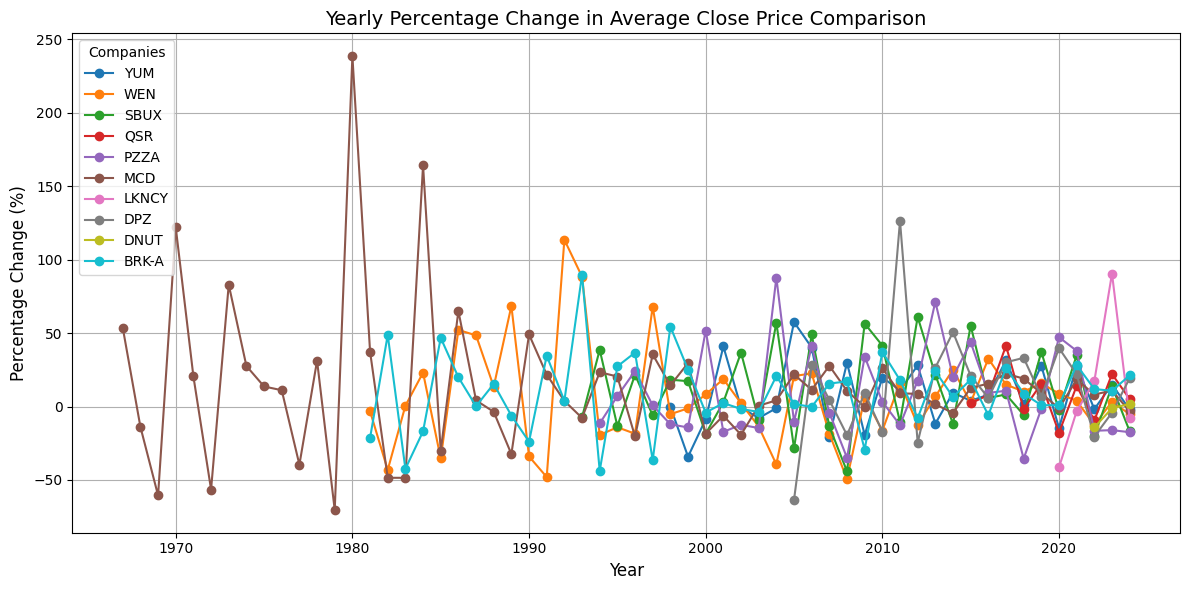

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the yearly average table from the previous step
# Assuming `yearly_avg_table` is already created and available

# Compute yearly percentage change in close prices
percentage_change_data = {}

for company in yearly_avg_table.columns[1:]:  # Exclude 'Year' column
    yearly_avg_table[company] = pd.to_numeric(yearly_avg_table[company], errors='coerce')  # Ensure numeric values
    percentage_change = yearly_avg_table[company].pct_change() * 100
    percentage_change_data[company] = percentage_change

# Convert the percentage change data into a DataFrame
percentage_change_df = pd.DataFrame(percentage_change_data)
percentage_change_df['Year'] = yearly_avg_table['Year']

# Plotting the percentage change comparison
plt.figure(figsize=(12, 6))

for company in percentage_change_data.keys():
    valid_data = percentage_change_df[['Year', company]].dropna()  # Drop rows with NA values
    plt.plot(
        valid_data['Year'], 
        valid_data[company], 
        marker='o', 
        label=company
    )

plt.title("Yearly Percentage Change in Average Close Price Comparison", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()
plt.show()


## Trend Analysis

1. **Maturity**: The post-2000 era demonstrates a significant reduction in volatility for most companies, reflecting their transition into more mature phases of growth. For example, companies like McDonald's (MCD) and Starbucks (SBUX) had largely established their global footprints by the 2000s. With diversified revenue streams across multiple regions, these companies became less vulnerable to economic conditions in any single market. Additionally, their increased business scale and operational efficiency contributed to lower stock price volatility, as illustrated in the graph. 

2. **Economic Cycles (Booms and Recessions)**: The graph captures broader market trends and the influence of economic cycles on performance. The fast-food and beverage sectors, being closely tied to disposable income, are inherently cyclical. Recessionary periods, such as those in the 1980s and 2000s, likely led to earnings volatility and corresponding declines in stock performance, explaining the dips seen in certain years. Conversely, economic boom periods are also evident in the chart. For instance, during the 2010s, nearly all 10 companies displayed consistently positive annual performance, reflecting the favorable economic environment of that decade.

3. **Market Saturation and Innovation**: The stabilization in volatility post-2000 also reflects market saturation within the fast-food and beverage sectors. By this period, many companies had reached their peak expansion in developed markets, limiting opportunities for exponential growth. This saturation necessitated a shift toward innovation to maintain relevance and attract new customers. Strategies such as menu diversification, sustainability initiatives, and the adoption of digital tools (e.g., delivery apps and loyalty programs) likely played a role in sustaining performance. However, the reduced growth potential in saturated markets contributed to the more predictable and less volatile stock performance observed in the graph.


## Justification of Chart Selection
A line graph is the most effective visual tool for presenting the performance of all companies at a glance. As noted above, the differing IPO dates of the companies create challenges for direct comparison due to the varying time horizons. The line graph effectively illustrates these distinct time frames, providing a clear overview despite the differences.

Alternative visualizations, such as pie charts or bar graphs, are unsuitable for this analysis because they fail to capture the fluctuations in annual performance over time. Using these formats would require condensing each company's annual performance data into a single metric, obscuring valuable insights about their actual performance trends.

That said, a key drawback of line graphs is that they can become difficult to interpret when plotting data for 10 companies simultaneously. To address this, we created additional graphics to provide a clearer view of the data. Each graph is accompanied by a brief commentary to enhance understanding.








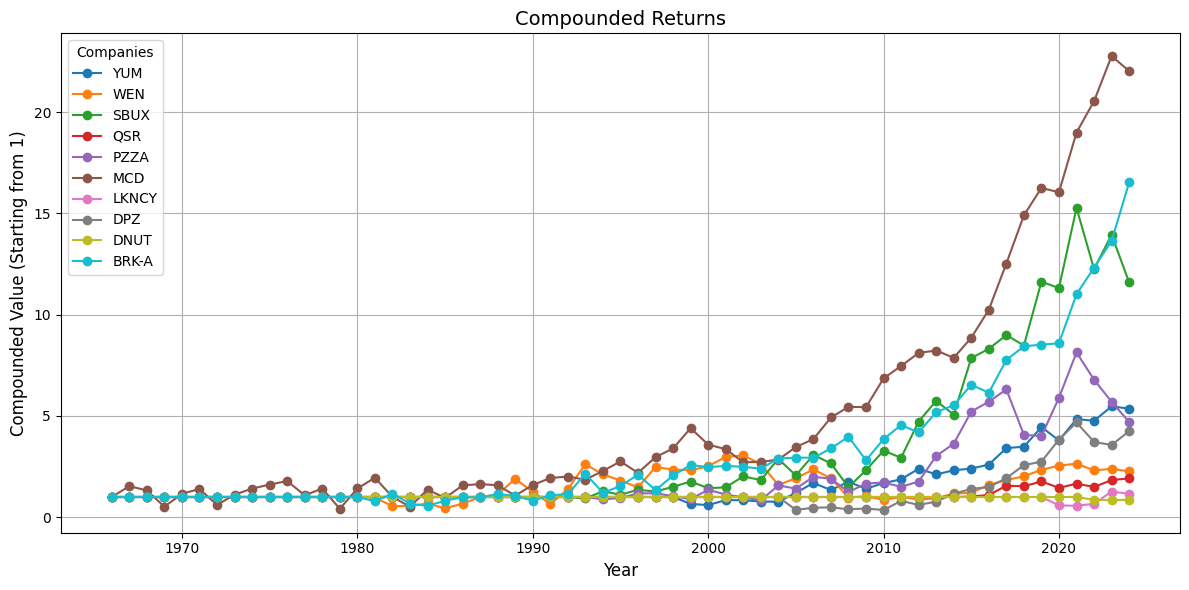

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute compounded returns starting from 1 using `yearly_avg_table`
compounded_returns = {}

for company in yearly_avg_table.columns[1:]:  # Exclude 'Year' column
    yearly_avg_table[company] = pd.to_numeric(yearly_avg_table[company], errors='coerce')  # Ensure numeric values
    # Calculate percentage change and compounded returns
    percentage_change = yearly_avg_table[company].pct_change().fillna(0)
    compounded_return = (1 + percentage_change).cumprod()
    compounded_returns[company] = compounded_return

# Combine all compounded return data into a single DataFrame for plotting
compounded_returns_df = pd.DataFrame(compounded_returns)
compounded_returns_df['Year'] = yearly_avg_table['Year']

# Plotting the compounded returns comparison
plt.figure(figsize=(12, 6))
for company in compounded_returns_df.columns[:-1]:  # Exclude 'Year' column
    valid_data = compounded_returns_df[['Year', company]].dropna()  # Drop rows with NA values for each company
    if not valid_data.empty:  # Ensure data exists for the company
        plt.plot(
            valid_data['Year'], 
            valid_data[company], 
            marker='o', 
            label=company
        )

plt.title("Compounded Returns", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Starting from 1)", fontsize=12)
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()
plt.show()


### Commentary:
The diagram shows the compounded returns for all 10 companies. Among these, McDonald's (MCD) demonstrates the highest overall performance, indicating it would have been the most profitable investment if purchased at its IPO.

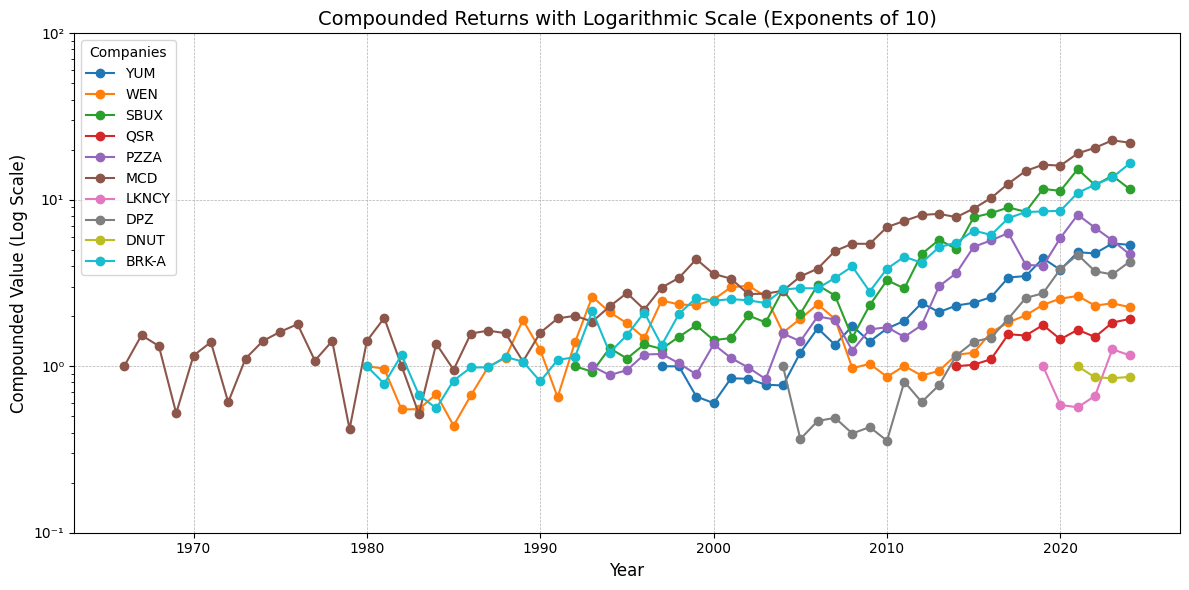

In [7]:
# Adjusting data for log scale (handling negative and zero values)
adjusted_compounded_returns_df = compounded_returns_df.copy()
adjusted_compounded_returns_df[adjusted_compounded_returns_df <= 0] = None  # Replace non-positive values with NaN

# Plotting the adjusted data with exponents of 10 on the y-axis
plt.figure(figsize=(12, 6))
for company in adjusted_compounded_returns_df.columns:
    plt.plot(adjusted_compounded_returns_df.index, adjusted_compounded_returns_df[company], marker='o', label=company)

plt.title("Compounded Returns with Logarithmic Scale (Exponents of 10)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Log Scale)", fontsize=12)
plt.yscale("log")
plt.ylim(0.1, 100)  # Set y-axis limits to range from near-zero to 100
plt.yticks([0.1, 1, 10, 100], labels=["10⁻¹", "10⁰", "10¹", "10²"])
plt.grid(True, which="major", linestyle='--', linewidth=0.5)  # Keep only major gridlines
plt.legend(title="Companies")
plt.tight_layout()
plt.show()


### Commentary:
The compounded returns, presented on a exponential scale, reaffirm the conclusion that McDonald’s (MCD) delivers the highest overall performance.


# Bar Graph

### Another way of graphing the data would be to look at the average annual performance of each company. 

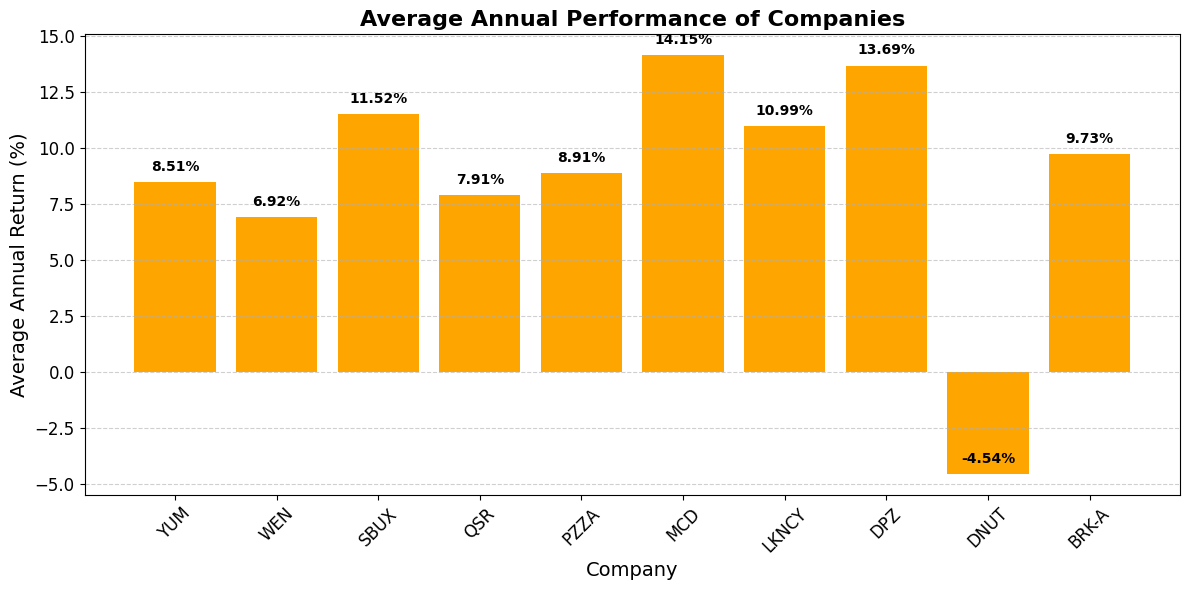

In [18]:
import matplotlib.pyplot as plt

# Compute average annual performance (percentage change) for each company
annual_performance = {}

for company, path in file_paths.items():
    data = pd.read_csv(path)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    yearly_avg = data.groupby('Year')['Close'].mean()
    annual_return = yearly_avg.pct_change().mean() * 100  # Compute average annual return in percentage
    annual_performance[company] = annual_return

# Create a bar chart of average annual performance
companies = list(annual_performance.keys())
performance = list(annual_performance.values())

# Create a bar chart with orange color and add percentage labels on bars
plt.figure(figsize=(12, 6))
plt.bar(companies, performance, color="orange")

# Add titles and labels
plt.title("Average Annual Performance of Companies", fontsize=16, fontweight='bold')
plt.xlabel("Company", fontsize=14)
plt.ylabel("Average Annual Return (%)", fontsize=14)

# Customize tick marks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on top of each bar
for index, value in enumerate(performance):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10, fontweight='bold', color='black')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### Commentary:
The bar graph shows the average annual percentage performance of each company. We can see that McDonalds also has the highest average pecentage performance. Only one company, namely Krispy Kreme (DNUT) presents a negative average performance. 